In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

#### To predict whether an individual's annual income exceeds $50,000 using the "Adult" dataset.


#### The goal is often to predict whether an individual earns more than $50,000 a year based on various demographic and employment-related attributes

age - Integer value representing the age of the individual.

workclass - Categorical variable indicating the type of employer (e.g., Private, Self-emp-not-inc, etc.).

fnlwgt - Continuous variable representing the final weight, which is a proxy for the number of people represented by the individual.

education - Categorical variable indicating the highest level of education achieved (e.g., Bachelors, HS-grad, etc.).

education.num -	Integer value representing the numerical encoding of education levels.

marital.status - Categorical variable indicating the marital status of the individual (e.g., Married-civ-spouse, Divorced, etc.).

occupation - Categorical variable representing the individual's occupation (e.g., Tech-support, Craft-repair, etc.).

relationship - Categorical variable representing the individual's relationship status within a family (e.g., Wife, Own-child, etc.).

race - Categorical variable indicating the race of the individual (e.g., White, Black, etc.).

sex	- Categorical variable indicating the gender of the individual (Male or Female).

capital.gain - Continuous variable representing the capital gains received by the individual.

capital.loss - Continuous variable representing the capital losses incurred by the individual.

hours.per.week - Continuous variable indicating the number of hours the individual works per week.

native.country - Categorical variable representing the country of origin for the individual (e.g., United-States, Mexico, etc.).

income - Categorical variable indicating the income category of the individual (<=50K or >50K).

In [2]:
df = pd.read_csv('adult.csv')
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [3]:
features=df.iloc[:,:-1]
target=df['income']

In [4]:
features

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States


In [5]:
target

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32556    <=50K
32557    <=50K
32558     >50K
32559    <=50K
32560    <=50K
Name: income, Length: 32561, dtype: object

In [6]:
df.replace("?",np.nan,inplace=True)

In [7]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [8]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [9]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [12]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

#### Handling Missing values

In [13]:
df['workclass'].value_counts(normalize=True)

workclass
Private             0.738682
Self-emp-not-inc    0.082701
Local-gov           0.068120
State-gov           0.042246
Self-emp-inc        0.036322
Federal-gov         0.031245
Without-pay         0.000456
Never-worked        0.000228
Name: proportion, dtype: float64

Distribution of income levels (<=50K and >50K) across different work classes, indicating that the majority of individuals in the 'Private' work class earn <=50K.
To fill the missing values in the 'workclass' feature, it is generally better to use the mode (most frequent value) because it maintains the distribution and the majority representation in the data. In this case, the mode is 'Private'.

In [14]:
df['workclass'] = df['workclass'].fillna('Private')

In [15]:
df['workclass'].value_counts(normalize=True)

workclass
Private             0.753417
Self-emp-not-inc    0.078038
Local-gov           0.064279
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Without-pay         0.000430
Never-worked        0.000215
Name: proportion, dtype: float64

In [16]:
df.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [17]:
df['occupation'] = df['occupation'].fillna(df['occupation'].mode()[0])

In [18]:
df.isnull().sum()

age                 0
workclass           0
fnlwgt              0
education           0
education.num       0
marital.status      0
occupation          0
relationship        0
race                0
sex                 0
capital.gain        0
capital.loss        0
hours.per.week      0
native.country    583
income              0
dtype: int64

In [19]:
df['native.country'].value_counts(normalize=True)

native.country
United-States                 0.912190
Mexico                        0.020108
Philippines                   0.006192
Germany                       0.004284
Canada                        0.003784
Puerto-Rico                   0.003565
El-Salvador                   0.003315
India                         0.003127
Cuba                          0.002971
England                       0.002814
Jamaica                       0.002533
South                         0.002502
China                         0.002345
Italy                         0.002283
Dominican-Republic            0.002189
Vietnam                       0.002095
Guatemala                     0.002001
Japan                         0.001939
Poland                        0.001876
Columbia                      0.001845
Taiwan                        0.001595
Haiti                         0.001376
Iran                          0.001345
Portugal                      0.001157
Nicaragua                     0.001063
Peru      

In [20]:
df['native.country'].mode()[0]

'United-States'

In [21]:
# Filling any missing values (NaN) in the native.country column with "United-States" which is the mode.
df['native.country'] = df['native.country'].fillna('United-States')

In [22]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [97]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,3.769612,Private,-1.067997,HS-grad,-0.420060,Widowed,Prof-specialty,Not-in-family,White,Female,-0.14592,10.593507,-0.035429,United-States,<=50K
1,3.183112,Private,-0.539169,HS-grad,-0.420060,Widowed,Exec-managerial,Not-in-family,White,Female,-0.14592,10.593507,-1.817204,United-States,<=50K
2,2.010110,Private,-0.035220,Some-college,-0.031360,Widowed,Prof-specialty,Unmarried,Black,Female,-0.14592,10.593507,-0.035429,United-States,<=50K
3,1.130359,Private,-0.468215,secondary_school,-2.363558,Widowed,Machine-op-inspct,Unmarried,White,Female,-0.14592,9.461864,-0.035429,United-States,<=50K
4,0.177296,Private,0.709482,Some-college,-0.031360,Separated,Prof-specialty,Own-child,White,Female,-0.14592,9.461864,-0.035429,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-1.215643,Private,1.140460,Some-college,-0.031360,NotMarried,Protective-serv,Not-in-family,White,Male,-0.14592,-0.216660,-0.035429,United-States,<=50K
32557,-0.849080,Private,0.639741,Assoc,0.746039,Married,Tech-support,Wife,White,Female,-0.14592,-0.216660,-0.197409,United-States,<=50K
32558,0.103983,Private,-0.335433,HS-grad,-0.420060,Married,Machine-op-inspct,Husband,White,Male,-0.14592,-0.216660,-0.035429,United-States,>50K
32559,1.423610,Private,-0.358777,HS-grad,-0.420060,Widowed,Adm-clerical,Unmarried,White,Female,-0.14592,-0.216660,-0.035429,United-States,<=50K


In [23]:
num_cols= df.select_dtypes('number').columns
skew_limit = 0.75              
skew_vals = df[num_cols].skew()
# Showing the skewed columns
skew_cols = (skew_vals.sort_values(ascending=False).to_frame().rename(columns={0:'Skew'}).query('abs(Skew) > {}'.format(skew_limit)))
skew_cols

,Skew
capital.gain,11.953848
capital.loss,4.594629
fnlwgt,1.446980


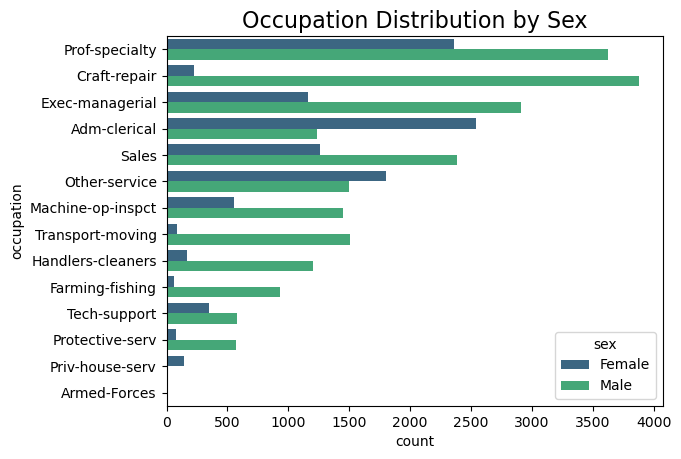

In [24]:
sns.countplot(y='occupation', hue='sex', data=df, order=df['occupation'].value_counts().index, palette='viridis')
plt.title('Occupation Distribution by Sex', fontsize=16);

Observations:
Prof-specialty: This occupation has a higher number of males compared to females.
Craft-repair: Similar to Prof-specialty, there are more males than females.
Exec-managerial: Males dominate this field as well.
Adm-clerical: This is one of the few occupations where the number of females is higher than males.
Sales: The distribution is more balanced, but males still outnumber females.
Other-service: Females have a higher count in this occupation.
Machine-op-inspct: Males are significantly more in number.
Transport-moving: Again, males dominate this field.
Handlers-cleaners: More males are employed in this occupation.
Farming-fishing: Males are more prevalent.
Tech-support: Males outnumber females.
Protective-serv: Males are significantly higher in number.
Priv-house-serv: Females dominate this occupation.
Armed-Forces: Males are overwhelmingly more in number.

Feature Engineering

In [25]:
df['education'].replace(['1st-4th', '5th-6th'], 'elementary_school', inplace=True)
df['education'].replace(['7th-8th', '9th', '10th', '11th', '12th'], 'secondary_school', inplace=True)
df['education'].replace(['Assoc-acdm', 'Assoc-voc'], 'Assoc', inplace=True)

Category Merging: Dividing education levels into too many categories can complicate data analysis and modeling processes. Therefore, similar levels have been combined to form larger and more meaningful categories.

In [26]:
df['marital.status'].replace(['Never-married'], 'NotMarried', inplace=True)
df['marital.status'].replace(['Married-AF-spouse', 'Married-civ-spouse'], 'Married', inplace=True)
df['marital.status'].replace(['Married-spouse-absent', 'Separated'], 'Separated', inplace=True)
df['marital.status'].replace(['Divorced', 'Widowed'], 'Widowed', inplace=True)

Marital Status Categories Merging In order to simplify the analysis and improve model performance, we combined similar marital status categories. This helps in reducing the number of distinct categories, making the data more manageable and the results more interpretable.

Married-civ-spouse corresponds to a civilian spouse while Married-AF-spouse is a spouse in the Armed Forces.
Married, spouse absent" and "separated" are two marital status categories that describe people who are not living with their spouse

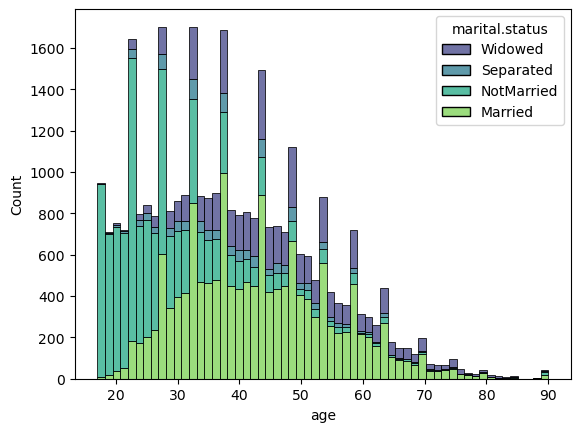

In [27]:
sns.histplot(data=df, x='age', hue='marital.status', multiple='stack', palette='viridis');

Marriage and Age: Marriage rates are low among young adults, peak in middle age, and decline again in older age. This indicates that focusing on education and career is common in early life, marriage and family building are more prevalent in middle age, and loss of a spouse increases in older age.

Tendency Not to Marry: The non-marriage rates are higher among younger age groups, suggesting that education and career-oriented lifestyles are more common in modern societies.

Loss of Spouse and Separations: Widowhood is more common in older age, while separations are more concentrated in middle age. This suggests that both increased rates of spouse loss due to health reasons and midlife crises or marital problems are more frequent in these age groups.

In [28]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [29]:
df_numerical = df.select_dtypes(include='int64')
df_numerical

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
0,90,77053,9,0,4356,40
1,82,132870,9,0,4356,18
2,66,186061,10,0,4356,40
3,54,140359,4,0,3900,40
4,41,264663,10,0,3900,40
...,...,...,...,...,...,...
32556,22,310152,10,0,0,40
32557,27,257302,12,0,0,38
32558,40,154374,9,0,0,40
32559,58,151910,9,0,0,40


In [30]:
df_categorical = df.select_dtypes(include='object')
df_categorical

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,Private,HS-grad,Widowed,Prof-specialty,Not-in-family,White,Female,United-States,<=50K
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
2,Private,Some-college,Widowed,Prof-specialty,Unmarried,Black,Female,United-States,<=50K
3,Private,secondary_school,Widowed,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Some-college,NotMarried,Protective-serv,Not-in-family,White,Male,United-States,<=50K
32557,Private,Assoc,Married,Tech-support,Wife,White,Female,United-States,<=50K
32558,Private,HS-grad,Married,Machine-op-inspct,Husband,White,Male,United-States,>50K
32559,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K


Data cleaning is not required as there are no numerical columns as object

## Label Encoding Categorical columns

In [31]:
#separating num and cat columns
df_numerical = df.select_dtypes(include='int64')

df_categorical = df.select_dtypes(include='object')


In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
le = LabelEncoder()

In [34]:
for i in df_categorical:
    df_categorical[i] = le.fit_transform(df_categorical[i])

In [35]:
df_categorical

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,3,3,3,9,1,4,0,38,0
1,3,3,3,3,1,4,0,38,0
2,3,7,3,9,4,2,0,38,0
3,3,9,3,6,4,4,0,38,0
4,3,7,2,9,3,4,0,38,0
...,...,...,...,...,...,...,...,...,...
32556,3,7,1,10,1,4,1,38,0
32557,3,0,0,12,5,4,0,38,0
32558,3,3,0,6,0,4,1,38,1
32559,3,3,3,0,4,4,0,38,0


## Scaling Numerical Columns

In [36]:
from sklearn.preprocessing import StandardScaler

df_numerical = df.select_dtypes(include=['int64', 'float64'])

scaler = StandardScaler()

df[df_numerical.columns] = scaler.fit_transform(df_numerical)


In [37]:
df_numerical

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
0,90,77053,9,0,4356,40
1,82,132870,9,0,4356,18
2,66,186061,10,0,4356,40
3,54,140359,4,0,3900,40
4,41,264663,10,0,3900,40
...,...,...,...,...,...,...
32556,22,310152,10,0,0,40
32557,27,257302,12,0,0,38
32558,40,154374,9,0,0,40
32559,58,151910,9,0,0,40


Concatenate the numerical columns and categorical columns

In [38]:
df1 = pd.concat([df_numerical, df_categorical], axis = 1)
x = df1.head(32561).iloc[:,:-1]

y = df1.head(32561).iloc[:,-1]

In [39]:
y.value_counts()

income
0    24720
1     7841
Name: count, dtype: int64

#### To check the is balanced or not

In [40]:
print(df['income'].value_counts())

income
<=50K    24720
>50K      7841
Name: count, dtype: int64


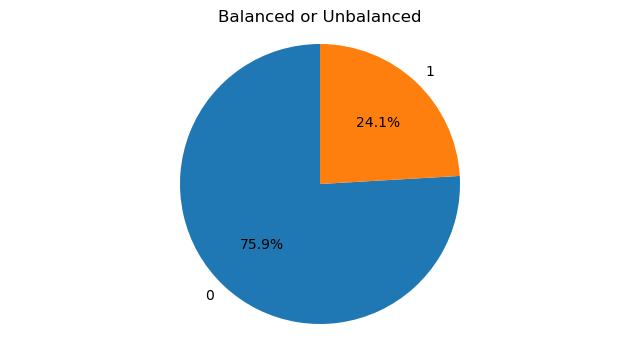

In [41]:
y_value_counts = y.value_counts()
plt.figure(figsize=(8, 4))
plt.pie(y_value_counts, labels=y_value_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Balanced or Unbalanced')
plt.axis('equal')  
plt.show()


over data is unbalanced

to balance the data we use oversampling and undersampling

In [42]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state = 42)
x_ros, y_ros = ros.fit_resample(x,y)
x = x_ros
y = y_ros

In [43]:
y_ros.value_counts()

income
0    24720
1    24720
Name: count, dtype: int64

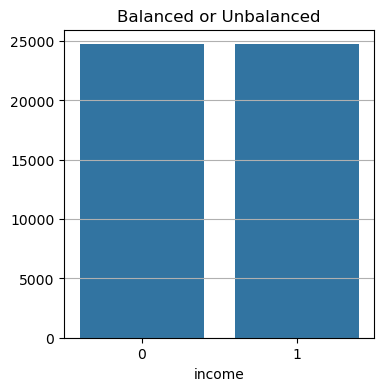

In [99]:
y_ros_value_counts = y_ros.value_counts()

plt.figure(figsize=(4, 4))
plt.grid()
sns.barplot(x=y_ros_value_counts.index, y=y_ros_value_counts.values)

plt.xlabel('income')
plt.title('Balanced or Unbalanced')
plt.show()

##### Now our Data is Balanced 

In [45]:
df1.corr()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.040504,-0.057588,0.025072,0.001739,-0.263698,0.028718,0.088832,-0.000270,0.234037
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.024338,0.024001,-0.000718,0.000188,0.008931,-0.021291,0.026858,-0.063286,-0.009463
education.num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.003536,-0.581666,-0.078852,0.070954,-0.094153,0.031838,0.012280,0.088894,0.335154
capital.gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.031505,-0.030408,-0.058226,0.018021,-0.057919,0.011145,0.048480,0.008819,0.223329
capital.loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.002644,-0.035724,-0.055292,0.009680,-0.061062,0.018899,0.045567,0.009401,0.150526
hours.per.week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.042199,-0.132647,-0.119239,-0.012879,-0.248974,0.041910,0.229309,0.006592,0.229689
workclass,0.040504,-0.024338,0.003536,0.031505,0.002644,0.042199,1.000000,0.013992,-0.053472,0.007110,-0.057947,0.048350,0.071584,-0.001625,0.002693
education,-0.057588,0.024001,-0.581666,-0.030408,-0.035724,-0.132647,0.013992,1.000000,0.045034,-0.003210,0.080476,-0.023467,-0.018104,-0.053270,-0.170368
marital.status,0.025072,-0.000718,-0.078852,-0.058226,-0.055292,-0.119239,-0.053472,0.045034,1.000000,-0.037262,0.416202,-0.058903,-0.425988,0.010199,-0.323262
occupation,0.001739,0.000188,0.070954,0.018021,0.009680,-0.012879,0.007110,-0.003210,-0.037262,1.000000,-0.037451,-0.004839,0.047461,-0.002217,0.034625


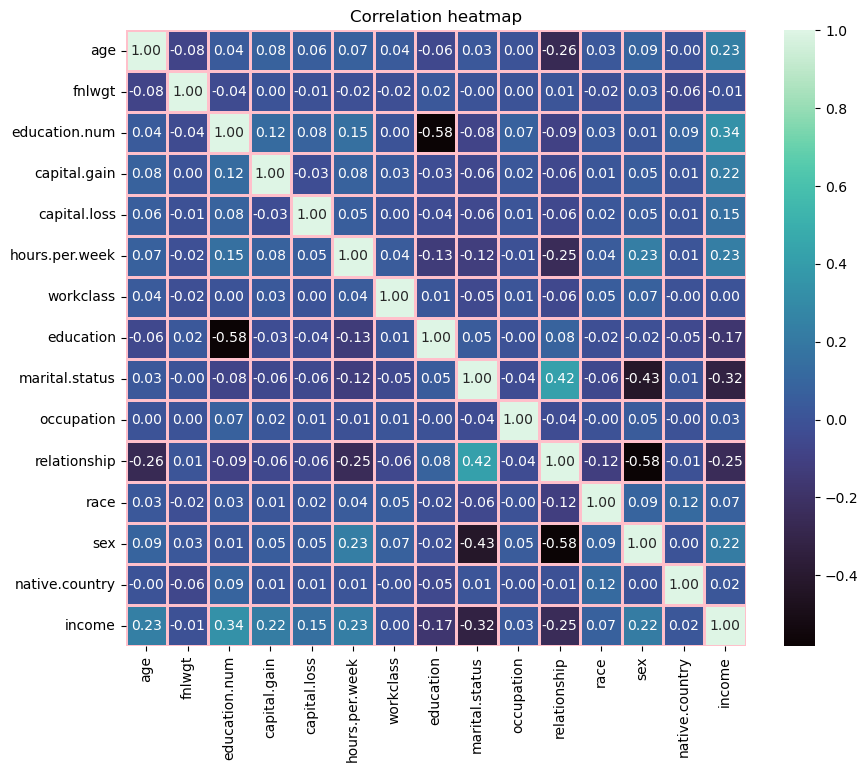

In [46]:
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(), annot=True,cmap='mako',linecolor='pink',fmt = '.2f', linewidth=2)
plt.title('Correlation heatmap')
plt.show()

### Splitting data into x train and y train

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score

In [48]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

## 1. Logistics Regression

In [49]:
logreg = LogisticRegression()

In [50]:
def mymodel(model):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(classification_report(y_test,y_pred))
    return model

In [51]:
mymodel(logreg)

              precision    recall  f1-score   support

           0       0.68      0.76      0.72      7393
           1       0.73      0.65      0.69      7439

    accuracy                           0.70     14832
   macro avg       0.70      0.70      0.70     14832
weighted avg       0.70      0.70      0.70     14832



LogisticRegression()

### Hyperparameter Tuning using GridSearch cv

In [52]:
parameters={'solver':['poly','liblinear','lbfgs','saga','sag','newton-cg'],'penalty':['none','l1','l2','elasticnet'],'C':[100,10,1,0.1,0.01]}
gsLogreg=GridSearchCV(logreg,parameters,verbose=3)

In [53]:
gsLogreg.fit(x_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END ....C=100, penalty=none, solver=poly;, score=nan total time=   0.0s
[CV 2/5] END ....C=100, penalty=none, solver=poly;, score=nan total time=   0.0s
[CV 3/5] END ....C=100, penalty=none, solver=poly;, score=nan total time=   0.0s
[CV 4/5] END ....C=100, penalty=none, solver=poly;, score=nan total time=   0.0s
[CV 5/5] END ....C=100, penalty=none, solver=poly;, score=nan total time=   0.0s
[CV 1/5] END C=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END ...C=100, penalty=none, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ...C=100, penalty=none, solv

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1, 0.1, 0.01],
                         'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['poly', 'liblinear', 'lbfgs', 'saga', 'sag',
                                    'newton-cg']},
             verbose=3)

### Getting Best HyperParameters

In [54]:
gsLogreg.best_params_

{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}

#### Getting best accuracy for Logistic Regression as per Hyper tuned best Parameters

In [55]:
logreg_hypertuned = LogisticRegression(C=10, penalty ='l2', solver='lbfgs')
mymodel(logreg_hypertuned)

              precision    recall  f1-score   support

           0       0.69      0.75      0.72      7393
           1       0.73      0.66      0.69      7439

    accuracy                           0.71     14832
   macro avg       0.71      0.71      0.70     14832
weighted avg       0.71      0.71      0.70     14832



LogisticRegression(C=10)

In [56]:
print("Logistic Reg:", logreg.score(x_train, y_train))
print("hypertuned Logistic Reg:", logreg_hypertuned.score(x_train,y_train))

Logistic Reg: 0.7071197411003236
hypertuned Logistic Reg: 0.7106738326398521


In [57]:
y_pred = logreg.predict(x_test)
accuracy_score(y_pred, y_test)

0.7022653721682848

In [58]:
y_pred = logreg_hypertuned.predict(x_test)
accuracy_score(y_pred,y_test)

0.705299352750809

### 2. Descision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
dt = DecisionTreeClassifier()

In [61]:
mymodel(dt)

              precision    recall  f1-score   support

           0       0.96      0.86      0.90      7393
           1       0.87      0.96      0.91      7439

    accuracy                           0.91     14832
   macro avg       0.91      0.91      0.91     14832
weighted avg       0.91      0.91      0.91     14832



DecisionTreeClassifier()

### Hyperparameter Tuning using GridSearch cv

In [62]:
parameters={'max_depth':['none',10,20,30],'min_samples_split':[2,5,10],'min_samples_leaf':[1,2,4]}
gsDt=GridSearchCV(dt,parameters,verbose=3)

In [63]:
gsDt.fit(x_train.head(10000), y_train.head(10000))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END max_depth=none, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 2/5] END max_depth=none, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 3/5] END max_depth=none, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 4/5] END max_depth=none, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 5/5] END max_depth=none, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 1/5] END max_depth=none, min_samples_leaf=1, min_samples_split=5;, score=nan total time=   0.0s
[CV 2/5] END max_depth=none, min_samples_leaf=1, min_samples_split=5;, score=nan total time=   0.0s
[CV 3/5] END max_depth=none, min_samples_leaf=1, min_samples_split=5;, score=nan total time=   0.0s
[CV 4/5] END max_depth=none, min_samples_leaf=1, min_samples_split=5;, score=nan total time=   0.0s
[CV 5/5] END max_depth=none, min_sampl

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': ['none', 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=3)

In [64]:
gsDt.best_params_

{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5}

In [65]:
dt_hypertuned = DecisionTreeClassifier(max_depth=10,min_samples_leaf=1,min_samples_split=10)
mymodel(dt_hypertuned)

              precision    recall  f1-score   support

           0       0.87      0.78      0.82      7393
           1       0.80      0.88      0.84      7439

    accuracy                           0.83     14832
   macro avg       0.84      0.83      0.83     14832
weighted avg       0.84      0.83      0.83     14832



DecisionTreeClassifier(max_depth=10, min_samples_split=10)

In [66]:
print("Decision Tree:", dt.score(x_train, y_train))
print("hypertuned Decision Tree:", dt_hypertuned.score(x_train,y_train))

Decision Tree: 0.9999711049468331
hypertuned Decision Tree: 0.8505258899676376


In [67]:
y_pred = dt.predict(x_test)
accuracy_score(y_pred, y_test)

0.9096548004314995

In [68]:
y_pred = dt_hypertuned.predict(x_test)
accuracy_score(y_pred,y_test)

0.8331984897518878

### 3. Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
mymodel(rf)

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      7393
           1       0.89      0.97      0.93      7439

    accuracy                           0.93     14832
   macro avg       0.93      0.92      0.92     14832
weighted avg       0.93      0.93      0.92     14832



RandomForestClassifier(random_state=42)

In [ ]:
Hyperparameter Tuning using GridSearch cv

In [71]:
forest_parameters = [{'max_depth': list(range(10,15)), 'max_features': list(range(0,14))}]
gsrf = GridSearchCV(estimator = rf, param_grid=forest_parameters, cv=5, n_jobs=2)

In [72]:
gsrf.fit(x_train.head(10000),y_train.head(10000))

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=2,
             param_grid=[{'max_depth': [10, 11, 12, 13, 14],
                          'max_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                           12, 13]}])

In [73]:
gsrf.best_params_

{'max_depth': 14, 'max_features': 7}

In [74]:
rf_hypertuned = RandomForestClassifier(max_depth=14, max_features=8, random_state=42)
mymodel(rf_hypertuned)

              precision    recall  f1-score   support

           0       0.93      0.81      0.87      7393
           1       0.84      0.94      0.89      7439

    accuracy                           0.88     14832
   macro avg       0.88      0.88      0.88     14832
weighted avg       0.88      0.88      0.88     14832



RandomForestClassifier(max_depth=14, max_features=8, random_state=42)

In [75]:
print("Random Forest", rf.score(x_train,y_train))
print("Hypertuned Random Forest:", rf_hypertuned.score(x_train, y_train))

Random Forest 0.9999711049468331
Hypertuned Random Forest: 0.9128525196486361


In [76]:
y_pred = rf.predict(x_test)
accuracy_score(y_pred,y_test)

0.9250943905070119

In [77]:
y_pred = rf_hypertuned.predict(x_test)
accuracy_score(y_pred,y_test)

0.8776294498381877

### 4.KNeighborsClassifier


In [100]:
from sklearn.neighbors import KNeighborsClassifier

In [79]:
knn = KNeighborsClassifier()

In [80]:
def mymodel(model):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(classification_report(y_test,y_pred))
    return model

In [81]:
mymodel(knn)

              precision    recall  f1-score   support

           0       0.76      0.65      0.70      7393
           1       0.69      0.79      0.74      7439

    accuracy                           0.72     14832
   macro avg       0.72      0.72      0.72     14832
weighted avg       0.72      0.72      0.72     14832



KNeighborsClassifier()

In [ ]:
Hyper parameter using grid search cv

In [83]:
parameters = {'n_neighbors': [3, 5, 7, 9],'weights': ['uniform', 'distance'],'metric': ['euclidean', 'manhattan', 'minkowski'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
gsKNN = GridSearchCV(knn, parameters, cv=5, verbose=3, n_jobs=-1)
gsKNN.fit(x_train.head(10000), y_train.head(10000))

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [84]:
gsKNN.best_params_

{'algorithm': 'brute',
 'metric': 'manhattan',
 'n_neighbors': 9,
 'weights': 'distance'}

In [86]:
knn_hypertuned = KNeighborsClassifier(metric = 'manhattan', n_neighbors=9, weights = 'distance',algorithm = 'brute')
mymodel(knn_hypertuned)

              precision    recall  f1-score   support

           0       0.94      0.68      0.79      7393
           1       0.75      0.95      0.84      7439

    accuracy                           0.82     14832
   macro avg       0.84      0.82      0.82     14832
weighted avg       0.84      0.82      0.82     14832



KNeighborsClassifier(algorithm='brute', metric='manhattan', n_neighbors=9,
                     weights='distance')

In [87]:
print("KNN Training Score:", knn_hypertuned.score(x_train, y_train))
print("KNN Test Score:", knn_hypertuned.score(x_test, y_test))

KNN Training Score: 0.9999711049468331
KNN Test Score: 0.8193770226537217


In [88]:
y_pred = knn.predict(x_test)
accuracy_score(y_pred,y_test)

0.7201995685005393

In [89]:
y_pred = knn_hypertuned.predict(x_test)
accuracy_score(y_pred,y_test)

0.8193770226537217

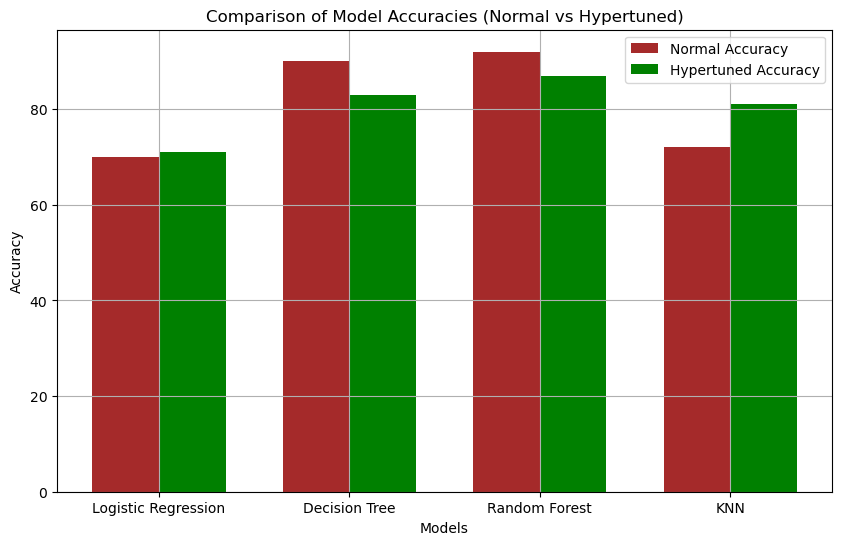

In [94]:
import matplotlib.pyplot as plt
import numpy as np


normal_accuracies = [0.70, 0.90, 0.92, 0.72]  
hypertuned_accuracies = [0.71, 0.83, 0.87, 0.81]  

normal_accuracies = [x * 100 for x in normal_accuracies]
hypertuned_accuracies = [x * 100 for x in hypertuned_accuracies]

models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN']


bar_width = 0.35
index = np.arange(len(models))

plt.figure(figsize=(10,6))
plt.bar(index, normal_accuracies, bar_width, label='Normal Accuracy', color='brown')
plt.bar(index + bar_width, hypertuned_accuracies, bar_width, label='Hypertuned Accuracy', color='g')


plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies (Normal vs Hypertuned)')
plt.xticks(index + bar_width / 2, models)
plt.legend()


plt.grid(True)
plt.show()


#### By the above observation logistic regression, K-Nearest Neighbors (KNN), decision tree and Random Forest algorithms, it has been observed that Random Forest achieved the highest accuracy among these models its accuracy is closed to 95% and also the hypertuned accuracy is cloased to 90% which is significantly higher than other models. the Random Forest algorithm appears to be the most suitable model for predicting income